In [2]:
from collections import Counter
from IPython.display import display
from datasets import load_dataset
from PIL import Image
import numpy as np
import cv2

In [4]:
dataset = load_dataset(path="mssqpi/Arabic-OCR-Dataset")

dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 2160000
    })
})

In [5]:
def display_samples(dataset, n=5, mode="rgb"):
  """
  """
  for split_name, split_data in dataset.items():

    print(f'\nShowing {n} images from split: {split_name}')

    for i in range(n):
      image = split_data[i]["image"]

      match mode:
        case "gray":
          image = image.convert("L")

        case "heat":
          gray = np.array(image.convert("L"))
          norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
          heat = cv2.applyColorMap(norm.astype(np.uint8), cv2.COLORMAP_JET)
          image = Image.fromarray(cv2.cvtColor(heat, cv2.COLOR_BGR2RGB))

        case _:
          image = image.convert("RGB")

      display(image)
      print()


Showing 2 images from split: train


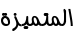

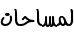



Showing 2 images from split: train


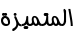

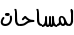



Showing 2 images from split: train


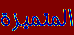

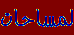

In [6]:
display_samples(dataset=dataset, n=2, mode="rgb")
display_samples(dataset=dataset, n=2, mode="gray")
display_samples(dataset=dataset, n=2, mode="heat")

In [7]:
def count_size_mode(dataset):
  """
  """
  for split_name, split_data in dataset.items():
      sizes = Counter()
      modes = Counter()

      for item in split_data:
          image = item["image"]

          sizes[(image.width, image.height)] += 1
          modes[image.mode]                  += 1

      print(f'\nSplit: {split_name}')

      for size, count in sizes.most_common(): print(f'{count} images of size {size}')

      for mode, count in modes.items(): print(f'{count} images with mode {mode}')

In [8]:
count_size_mode(dataset)


Split: train
25065 images of size (66, 27)
24933 images of size (65, 27)
24931 images of size (68, 27)
24872 images of size (67, 27)
24713 images of size (69, 27)
24711 images of size (64, 27)
24659 images of size (70, 27)
23983 images of size (71, 27)
23803 images of size (63, 27)
23471 images of size (72, 27)
23391 images of size (62, 27)
23045 images of size (73, 27)
22782 images of size (61, 27)
22309 images of size (74, 27)
21971 images of size (60, 27)
21474 images of size (59, 27)
21165 images of size (75, 27)
20333 images of size (76, 27)
20102 images of size (58, 27)
19234 images of size (77, 27)
19183 images of size (57, 27)
18450 images of size (78, 27)
17536 images of size (56, 27)
17516 images of size (79, 27)
16805 images of size (80, 27)
16617 images of size (55, 27)
15634 images of size (81, 27)
15278 images of size (54, 27)
14729 images of size (82, 27)
13971 images of size (53, 27)
13553 images of size (83, 27)
13190 images of size (52, 27)
12869 images of size (84, 

In [9]:
dataframe = dataset["train"].to_pandas()

dataframe.sample(20)["text"]

,text
1326009,استغلتها
932621,الباسيلية
1632460,وخزعبلات
424762,ونيوترون
1810258,المعرشة
1634302,وراحتنا
1878222,وبيرمان
387337,فأعادوه
1956662,بلاجيوس
775674,وحقوقهن


In [10]:
print(dataframe["text"].isna().sum())

0


In [12]:
print(dataframe.duplicated(subset="text").sum())

2040327


In [13]:
dataframe["length"] = dataframe["text"].apply(lambda sentence: len(sentence.split()))

dataframe.sample(20)

,image,text,length
1987725,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,واحتضنتها,1
2150529,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,مكافئتها,1
270715,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,المغراوي,1
672337,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,ونقحوها,1
1523903,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,مولودوفا,1
792003,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,وجمعياته,1
174922,"{'bytes': b""\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...",التحريمات,1
1400819,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,والداكن,1
874316,"{'bytes': b""\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...",بالأخضر,1
1914265,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,بموبيدا,1
